<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_Robust_Scaler_Pandas_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Let’s see **how outliers** affect the results after scaling the data with **robust scaling**.

- The following data set contains 10 data points, one of them being an **outlier (variable1 = 30).**

- On the contrary, if we apply robust scaling, both variables have the same values (-1.00,-1.00) after the transformation, because both features have the same median and interquartile range, being the outlier the value that is shifted.

----------------------

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])

df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


Text(0.5, 1.0, 'The scaling')

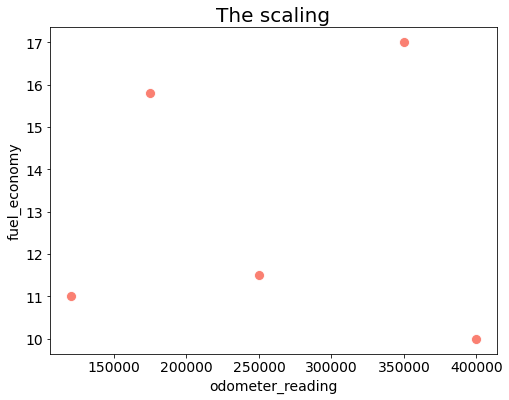

In [9]:
plt.figure(figsize=(8,6))
# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='odometer_reading', y='fuel_economy', data=df_cars, s=100, color='salmon')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('odometer_reading', fontsize=14)
plt.ylabel('fuel_economy', fontsize=14)
plt.title('The scaling', fontsize=20)

### **PANDAS**

In [6]:
# apply the robust scaling in Pandas using the .median() and .quantile() methods
def robust_scaling(df):
    # copy the dataframe
    df_robust = df.copy()
    # apply robust scaling
    for column in df_robust.columns:
        df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - df_robust[column].quantile(0.25))
    return df_robust
    
# call the robust_scaling function
df_cars_robust = robust_scaling(df_cars)

df_cars_robust

,odometer_reading,fuel_economy
0,-0.742857,-0.104167
1,0.000000,0.000000
2,-0.428571,0.895833
3,0.571429,1.145833
4,0.857143,-0.312500


- The **median** is defined as the midpoint of the distribution, meaning 50% of the values of the distribution are smaller than the median.

- In **Pandas**, we can calculate it with the **.median() or the .quantile(0.5)** methods.

- The **first quartile** is the median of the **lower half** of the data set **(25%** of the values lie below the first quartile) and can be calculated with the **.quantile(0.25)** method.

- The **third quartile** represents the median of the **upper half** of the data set **(75%** of the values lie below the third quartile) and can be calculated with the **.quantile(0.75)** method.

### **SCIKIT**

In [7]:
from sklearn.preprocessing import RobustScaler

# create a scaler object
scaler = RobustScaler()

# fit and transform the data
df_robust = pd.DataFrame(scaler.fit_transform(df_cars), columns=df_cars.columns)

df_robust

,odometer_reading,fuel_economy
0,-0.742857,-0.104167
1,0.000000,0.000000
2,-0.428571,0.895833
3,0.571429,1.145833
4,0.857143,-0.312500


- As shown above, we obtain the **same results** as before 🙌

- The following plot shows the results after transforming the data with **robust scaling**.

Text(0.5, 1.0, 'The Robust scaling')

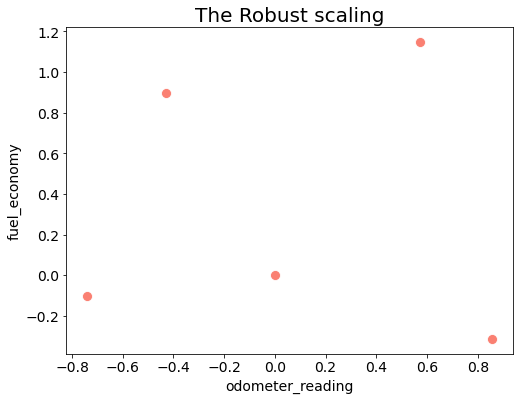

In [10]:
plt.figure(figsize=(8,6))
# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='odometer_reading', y='fuel_economy', data=df_robust, s=100, color='salmon')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('odometer_reading', fontsize=14)
plt.ylabel('fuel_economy', fontsize=14)
plt.title('The Robust scaling', fontsize=20)

### **Outliers**

In [2]:
# the data frame contains one outlier
df_data = pd.DataFrame({'variable1':[1,2,3,4,5,6,7,30], 'variable2':[1,2,3,4,5,6,7,8]})

df_data

,variable1,variable2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,30,8


In [3]:
from sklearn.preprocessing import RobustScaler

# create a scaler object
scaler = RobustScaler()

# fit and transform the data
df_robust = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)

df_robust

,variable1,variable2
0,-1.000000,-1.000000
1,-0.714286,-0.714286
2,-0.428571,-0.428571
3,-0.142857,-0.142857
4,0.142857,0.142857
5,0.428571,0.428571
6,0.714286,0.714286
7,7.285714,1.000000


Text(0.5, 1.0, 'The robust scaling')

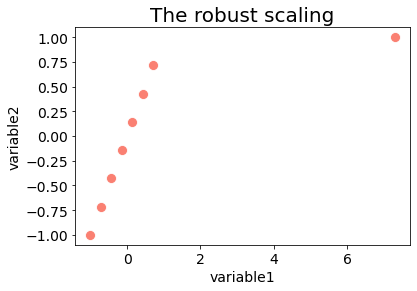

In [4]:
# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='variable1', y='variable2', data=df_robust, s=100, color='salmon')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('variable1', fontsize=14)
plt.ylabel('variable2', fontsize=14)
plt.title('The robust scaling', fontsize=20)